!!! Open: J:/MDLS_OBS_OHC/Area_data/myECCO_199201_201712_tsh.nc !!!
!!! linregress !!!


FileNotFoundError: [Errno 2] No such file or directory: 'salt_1993-01_2017-12/ECCO_salinity_regression_imf51993_2017.png'

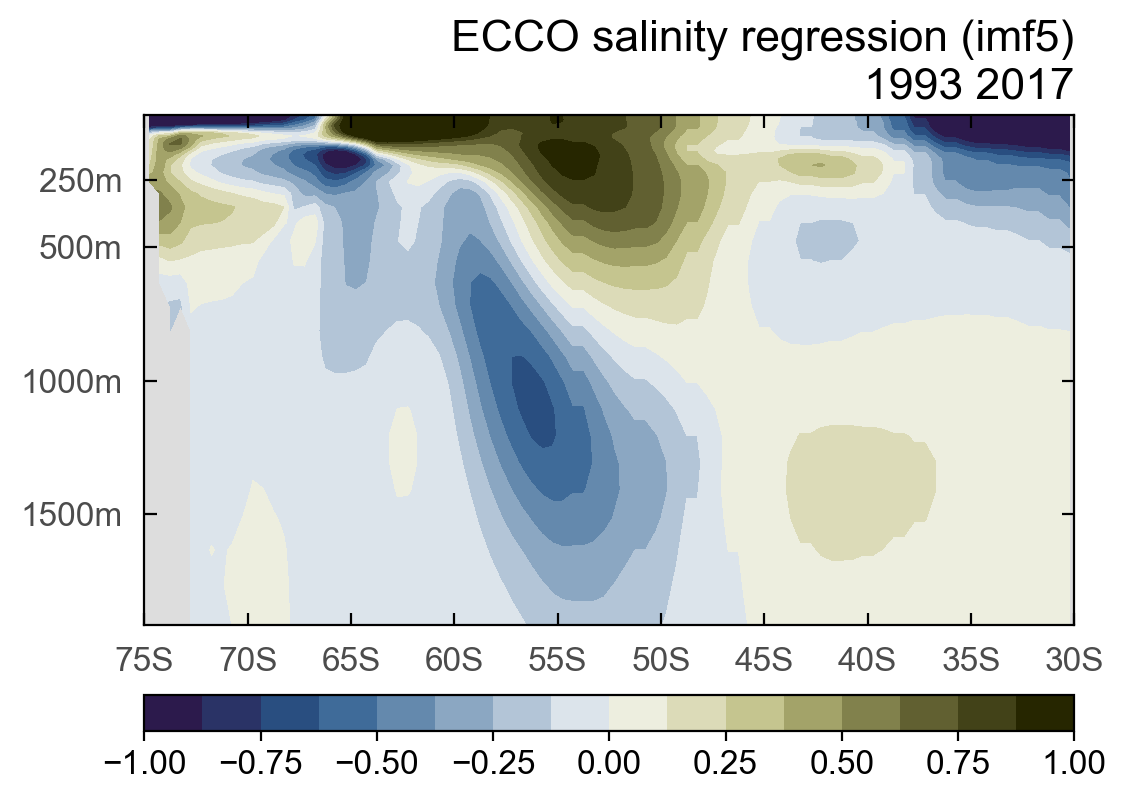

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
import matplotlib as mpl
from scipy.interpolate import griddata 
import warnings
import os
import numpy as np
sys.path.append('C:/Users/shjo/Bridge/JNUpack/SO/libs/')
warnings.filterwarnings('ignore')
from myTrend import myfitting2d_sttcs,myRegress3d_sttcs
from myPlot import  figmaster,myClrbr, dta_colr
import colormaps

### ======================================================================

pthMO='J:/MDLS_OBS_OHC/Area_data/'
myEEMD_pth='C:/Users/shjo/OneDrive/mySO/SCP_EEMD/OHC700_1993_2020_225E255E_65S45S/Figs/'

wpth='C:/Users/shjo/OneDrive/mySO/Regression_IMFs/'

ModeN=5
varnm='temp'
t_rng=['1993-01', '2017-12']
d_rng=[0,2000]

### =======================================================================
with open(myEEMD_pth+'EEMD_'+f'{ModeN:02d}'+'_mode.pickle', 'rb') as f:
    data = pickle.load(f)
Esig9317=data.mean(axis=1).loc[t_rng[0]:t_rng[-1]].values

### Preparation ============================================================
wpth=wpth+varnm+'_'+str(t_rng[0])+'_'+str(t_rng[-1])+'_mode'+'/'
try :
    os.mkdir(wpth)
except:
    raise

myMDOB=[pthMO+i for i in os.listdir(pthMO) if i.endswith('.nc')]
myDATA=myMDOB
if int(t_rng[0].split('-')[0])<1992:
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myECCO')]

### Read Data ==============================================================
lat_rng=[-75,-30]; lon_rng=[230,250]
for i in myDATA:
    print('!!! Open: '+i+' !!!')
    tmp=xr.open_dataset(i)

    mydata = tmp[varnm].loc[dict(lat=slice(lat_rng[0],lat_rng[-1]),lon=slice(lon_rng[0],lon_rng[-1])\
        ,time=slice(t_rng[0],t_rng[-1]),depth=slice(d_rng[0],d_rng[-1]))]
    mydata=mydata.where(mydata<10**30)
    mydata=mydata.mean(dim='lon',skipna=True)
    
    time,depthR,latR=mydata.time.values,mydata.depth.values,mydata.lat.values
    dta_nm=i.split('/')[-1][2:-3].split('_')[0]+' '+varnm+' regression (imf5)\n'+\
        str(time[0])[:4]+' '+str(time[-1])[:4]
    dta_snm=i.split('/')[-1][2:-3].split('_')[0]+' '+varnm+' regression imf5'+\
        str(time[0])[:4]+' '+str(time[-1])[:4]
    dta_snm=wpth+dta_snm.replace(' ','_').replace('salt','salinity')
    dta_nm=dta_nm.replace('salt','salinity')
    ### SST Coef =============================================================
    print('!!! linregress !!!')
    slope,intercept,r_value,p_value,std_err,smask=myRegress3d_sttcs(Esig9317,mydata,threshold=0.05)
    CoefD=slope*10**10 # Decadal^-1
    ### Figure configs =======================================================
    # myCoefs.append(CoefD); myNm.append(dta_nm); myLat.append(latR)
    # raise
    
    myN=16
    mylim=[-1.,1.]
    CMAP,mylevel=myClrbr('myblc2',mylim,myN)
    CMAP_salt,mylevel_salt=myClrbr('salt',mylim,myN)
    latR_m,depthR_m=np.meshgrid(latR,depthR)

    CoefD[CoefD<mylim[0]]=mylim[0]
    CoefD[CoefD>mylim[-1]]=mylim[-1]


    mySetting={
        'figsize': '',
        'mylabel': '',
        'Label_size':12,
        'title_loc':'right',
        'fontParams':'Arial',
        'wpth':wpth}
    F=figmaster(mySetting)
    
    F.Vertical_data_drift01(latR_m,-depthR_m,CoefD,CMAP_salt,mylevel,dta_nm,dta_snm)
    
    

In [3]:
print(np.arange(latR_m[0,0],latR_m[-1,-1]-1,5)+0.75)
print([f'{-ii:2.0f}S' for ii in np.arange(latR_m[0,0],latR_m[-1,-1]-1,5)])

[-74. -69. -64. -59. -54. -49. -44. -39. -34.]
['75S', '70S', '65S', '60S', '55S', '50S', '45S', '40S', '35S']


In [5]:
latR_m[0,0]

-74.75